In [1]:
# Necessary imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Import parametric statistics
from scipy.stats import ttest_ind, f_oneway, ttest_rel, shapiro
# Import nonparametric statistics
from scipy.stats import kruskal, wilcoxon
# Import test for normality
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 5.5.4 Challenge
Using selected questions from the 2012 and 2014 editions of the European Social Survey, address the following questions. Keep track of your code and results in a Jupyter notebook or other source that you can share with your mentor. For each question, explain why you chose the approach you did.

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [2]:
# Load in data
ess_raw = pd.read_csv('ESSdata_Thinkful.csv')
ess_raw.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
ess_raw.nunique()

cntry         6
idno       3086
year          2
tvtot         8
ppltrst      11
pplfair      11
pplhlp       11
happy        11
sclmeet       7
sclact        5
gndr          2
agea         83
partner       2
dtype: int64

## Question 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

We will first plot histograms of trust for each country:

					Distribution of trust


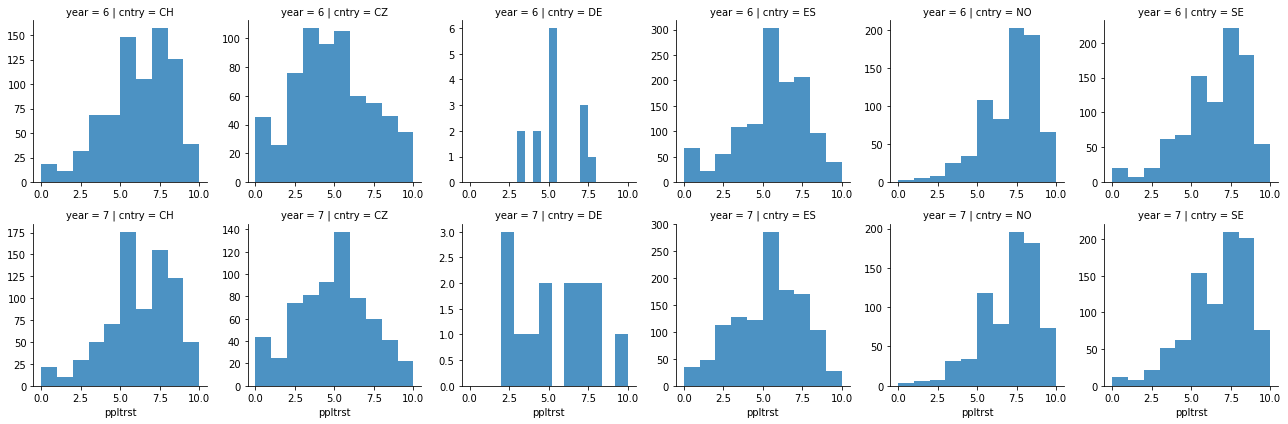

Shapiro Tests for Normality
CH 6 (0.9517106413841248, 9.510712936601148e-15)
CH 7 (0.9547930955886841, 2.465479128363826e-14)

CZ 6 (0.9680074453353882, 3.6126571179018185e-10)
CZ 7 (0.9715775847434998, 1.8777941424019673e-09)

DE 6 (0.8929166197776794, 0.10693283379077911)
DE 7 (0.9425466060638428, 0.4519253373146057)

ES 6 (0.949491024017334, 1.6942651933374377e-19)
ES 7 (0.9663601517677307, 1.5275811452092943e-15)

NO 6 (0.9211018085479736, 8.881221102071063e-19)
NO 7 (0.9292040467262268, 7.928973676032161e-18)

SE 6 (0.9367397427558899, 1.2586250953636158e-18)
SE 7 (0.9376322627067566, 1.3852298444033788e-18)



In [4]:
# Plotting histograms of trust for each country for each year
g = sns.FacetGrid(ess_raw, row='year', col='cntry', palette='pastel', dropna=True, sharey=False)
g = g.map(plt.hist, 'ppltrst', alpha=0.8)
print('\t\t\t\t\tDistribution of trust')
plt.show()

# Testing each country and each year to determine if trust is normally distributed through Shapiro test
# Creating lists of countries and years
cntrys = list(ess_raw.cntry.unique())
years = [6,7]
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Isolating data from each country
    ess_temp = ess_raw[ess_raw.cntry ==cnt].dropna()
    for year in years:
        # Printing Shapiro test results
        print(cnt, year, shapiro(ess_temp[ess_temp.year ==year].ppltrst))
    print()    

From the histograms and the Shapiro Test results, we can determine that the values are non-normally distributed. As we are comparing the same group of people, and the distribution is not normally distributed, I will use the Wilcoxon Signed-Rank test to find if there are difference between the distribution over both years.

In [5]:
# Wilcoxon Signed Rank Test for each country between years.
print('Wilcoxon Signed-Rank Test')
for cnt in cntrys:
    # Isolating data from each country
    ess_temp = ess_raw[ess_raw.cntry ==cnt]
    # Printing Shapiro test results
    print(cnt, wilcoxon(ess_temp[ess_temp.year == 6].ppltrst, 
                        y=ess_temp[ess_temp.year == 7].ppltrst))
    print()

Wilcoxon Signed-Rank Test
CH WilcoxonResult(statistic=106278.5, pvalue=0.44112865109524768)

CZ WilcoxonResult(statistic=82837.0, pvalue=0.29318914263273788)

DE WilcoxonResult(statistic=44.0, pvalue=0.91571346008998633)

ES WilcoxonResult(statistic=243475.5, pvalue=0.0055708296504396841)

NO WilcoxonResult(statistic=85392.0, pvalue=0.61391756699706612)

SE WilcoxonResult(statistic=130719.5, pvalue=0.028545290985536906)



/home/mache/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2400: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/home/mache/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2401: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


According to the Wilcoxon signed-rank test, Spain and Sweden were the two countries whose trust in people changed from 2012 to 2014.

## Question 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

					Distribution of happiness


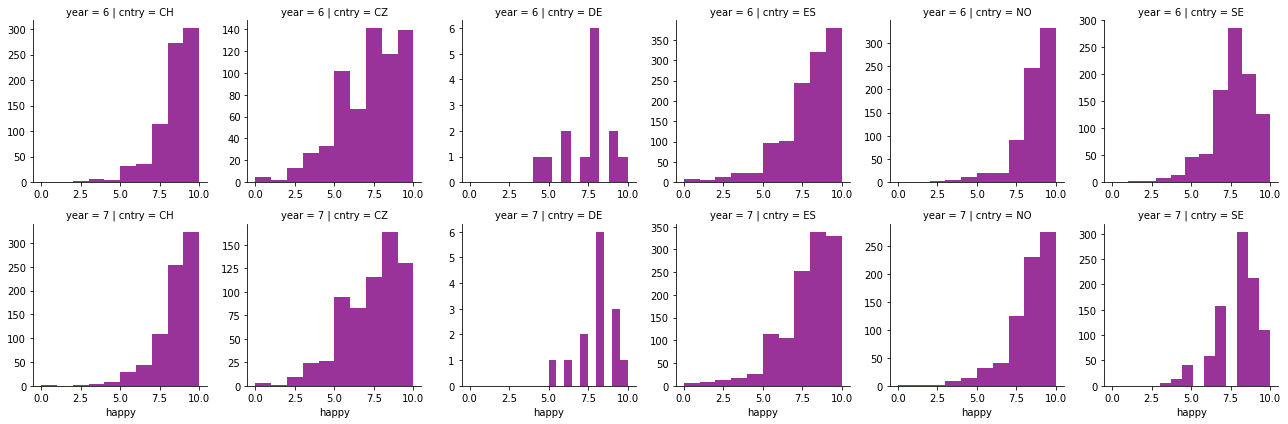

Shapiro Tests for Normality
CH 6 (0.8773602843284607, 1.4611401593361174e-23)
CH 7 (0.8950787782669067, 4.273768685964887e-22)

CZ 6 (0.9462587833404541, 5.939277796787254e-14)
CZ 7 (0.9448645710945129, 3.1643033327052525e-14)

DE 6 (0.9160983562469482, 0.22210942208766937)
DE 7 (0.9213663339614868, 0.23006466031074524)

ES 6 (0.9052610397338867, 3.4151276945678624e-26)
ES 7 (0.9136462211608887, 6.898695605418019e-25)

NO 6 (0.8498518466949463, 2.291937245544563e-25)
NO 7 (0.8795287609100342, 4.6808705797415216e-23)

SE 6 (0.9025380611419678, 5.918160728712866e-23)
SE 7 (0.912103533744812, 5.600742285549146e-22)



In [6]:
# Plotting histograms of happiness for each country for each year
g = sns.FacetGrid(ess_raw, row='year', col='cntry', dropna=True, sharey=False)
g = g.map(plt.hist, 'happy', alpha=0.8, color='purple')
print('\t\t\t\t\tDistribution of happiness')
plt.show()

# Testing each country and each year to determine if happiness is normally distributed through Shapiro test
# Creating lists of countries and years
cntrys = list(ess_raw.cntry.unique())
years = [6,7]
print('Shapiro Tests for Normality')
for cnt in cntrys:
    
    # Isolating data from each country
    ess_temp = ess_raw[ess_raw.cntry ==cnt].dropna()
    for year in years:
        
        # Printing Shapiro test results
        print(cnt, year, shapiro(ess_temp[ess_temp.year ==year].happy))
    print()    

According to the histograms and the Shapiro tests, all values are non-normally distributed. As we are comparing the same group of people, and the distribution is not normally distributed, I will use the Wilcoxon Signed-Rank test to find if there are difference between the distribution over both years.

In [7]:
# Wilcoxon Signed Rank Test for each country between years.
print('Wilcoxon Signed-Rank Test')
for cnt in cntrys:
    
    # Isolating data from each country
    ess_temp = ess_raw[ess_raw.cntry ==cnt]
    
    # Printing Shapiro test results
    print(cnt, wilcoxon(ess_temp[ess_temp.year == 6].happy, y=ess_temp[ess_temp.year == 7].happy))
    print()

Wilcoxon Signed-Rank Test
CH WilcoxonResult(statistic=92816.5, pvalue=0.82086881614253426)

CZ WilcoxonResult(statistic=73213.0, pvalue=0.01064243454053068)

DE WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)

ES WilcoxonResult(statistic=231958.5, pvalue=0.049238680843060129)

NO WilcoxonResult(statistic=67571.5, pvalue=2.7264367804254175e-06)

SE WilcoxonResult(statistic=125481.0, pvalue=0.51364034410050219)



/home/mache/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2400: RuntimeWarning: invalid value encountered in greater
  r_plus = np.sum((d > 0) * r, axis=0)
/home/mache/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:2401: RuntimeWarning: invalid value encountered in less
  r_minus = np.sum((d < 0) * r, axis=0)


Watching the Wilcoxon Signed-Rank tests, Czech Republic, Norway, and Spain suffered a happiness change between 2012 and 2014 as their p-values are below the threshhold rejecting the null hypothesis that the distributions are the same.

## Question 3. Who reported watching more TV in 2012, men or women?

In this case we are just comparing men from women, so these values are independent from one another. We can use t-test or Wilcoxon test to describe the distribution differences. 

In [8]:
ess_2012 = ess_raw[ess_raw.year == 6]

		Distribution of total TV Watching in 2012 for men and women


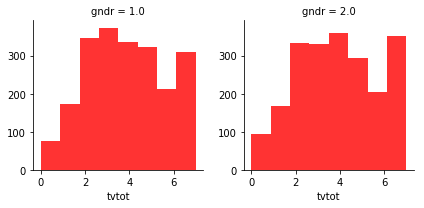

Males (1.0): (0.9434293508529663, 5.994494507539187e-28)
Females (2.0): (0.9390434622764587, 8.488309331265169e-29)


In [9]:
g = sns.FacetGrid(ess_2012, col='gndr', dropna=True, sharey=True)
g = g.map(plt.hist, 'tvtot', alpha=0.8, color='red', bins=8)

print('\t\tDistribution of total TV Watching in 2012 for men and women')
plt.show()

print('Males (1.0):', shapiro(ess_2012[ess_2012.gndr ==1].tvtot.dropna()))
print('Females (2.0):', shapiro(ess_2012[ess_2012.gndr ==2].tvtot.dropna()))

Watching the histograms and the Shapiro-Wilks test results we can affirm that the distribution of men and women watching tv time is not normally distributed, therefore we will use the Wilcoxon Signed-Rank test to determine if the distributions are different.

Next we determine what's the count for each gender:

In [10]:
ess_2012[ess_2012.gndr == 1].tvtot.dropna().count()

2151

In [11]:
ess_2012[ess_2012.gndr == 2].tvtot.dropna().count()

2140

In [12]:
# Printing Wilcoxon Test for TV watching across genders
print('Wilcoxon Test:', wilcoxon(ess_2012[ess_2012.gndr == 1].tvtot.dropna()[:2140], 
                                 y=ess_2012[ess_2012.gndr == 2].tvtot.dropna()))

Wilcoxon Test: WilcoxonResult(statistic=782530.0, pvalue=0.50335077823729635)


As the p-value is 0.5, above 0.05, we can affirm that there is not significant difference between the tv habits of men and women in this study.

# Question 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

		Distribution of Fairness in 2012 for People who Live with and without a Partner


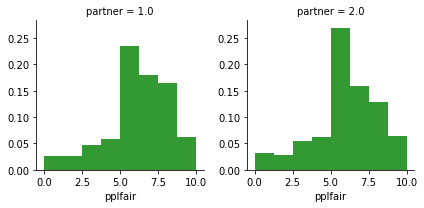

Lives with Partner (1.0): (0.94523686170578, 2.068099309311279e-30)
Lives Alone (2.0): (0.9332861304283142, 2.8958550733254737e-26)


In [13]:
g = sns.FacetGrid(ess_2012, col='partner', dropna=True, sharey=True)
g = g.map(plt.hist, 'pplfair', alpha=0.8, color='green', bins=8, normed=True)

print('\t\tDistribution of Fairness in 2012 for People who Live with and without a Partner')
plt.show()

print('Lives with Partner (1.0):', shapiro(ess_2012[ess_2012.partner ==1].tvtot.dropna()))
print('Lives Alone (2.0):', shapiro(ess_2012[ess_2012.partner ==2].tvtot.dropna()))

Watching the histograms and the Shapiro-Wilks test results we can affirm that the distribution the values is not normal, therefore we will use the Wilcoxon Signed-Rank test to determine if the distributions are different.

We now find the count for each case:

In [14]:
ess_2012[ess_2012.partner == 1].pplfair.dropna().count()

2663

In [15]:
ess_2012[ess_2012.partner == 2].pplfair.dropna().count()

1608

In [16]:
# Printing Wilcoxon Test for fairness across living with and without partners.  
# Using only first 1608 entries of living with partners to even counts.
print('Wilcoxon Test:', wilcoxon(ess_2012[ess_2012.partner == 1].pplfair.dropna()[:1608], 
                                 y=ess_2012[ess_2012.partner == 2].pplfair.dropna()))

Wilcoxon Test: WilcoxonResult(statistic=426739.0, pvalue=0.0043401582762541717)


According to the Wilcoxon test, there is a significant difference between the two distributions. Therefore we will calculate the median value to determine which has a higher median value of belief in fariness.

In [17]:
print('Median Fairness for People living with Partners:', ess_2012[ess_2012.partner == 1].pplfair.median())
print('Median Fairness for People living Alone:', ess_2012[ess_2012.partner == 2].pplfair.median())

Median Fairness for People living with Partners: 7.0
Median Fairness for People living Alone: 6.0


So, people who lived with partners had a greater belief that people were fair, compared to those living alone.

# Question 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
I will be using Czech Republic, Spain, Norway, and Sweden as our countries.

In [18]:
# Pulling out the countries in 2014
country_list = ['CZ','ES','NO','SE']
ess_c = ess_raw[(ess_raw.cntry.isin(country_list)) & (ess_raw.year == 7)]

		Distribution of Social Meetings from 2014 for Four European Countries


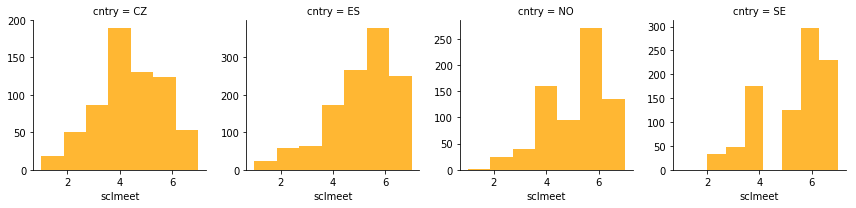

Shapiro Tests for Normality
CZ (0.9451602101325989, 7.663770300607355e-15)

ES (0.8880351781845093, 9.848293928138278e-29)

NO (0.8881818056106567, 1.422473605641294e-22)

SE (0.8798282146453857, 6.682967662559975e-26)



In [19]:
# Plotting histograms of happiness for each country for each year
g = sns.FacetGrid(ess_c, col='cntry', dropna=True, sharey=False)
g = g.map(plt.hist, 'sclmeet', alpha=0.8, color='orange', bins=7)

print('\t\tDistribution of Social Meetings from 2014 for Four European Countries')
plt.show()

# Testing each country and each year to determine if happiness is normally distributed through Shapiro test
# Creating lists of countries and years
cntrys = list(ess_c.cntry.unique())
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Isolating data from each country
    print(cnt, shapiro(ess_c[ess_c.cntry ==cnt].sclmeet.dropna()))
    # Printing Shapiro test results
    print()    

Watching the histograms and the Shapiro-Wilks test results we can affirm that the distribution of the values are not normal. I will choose the Kruskal-Wallis, a non-parametric version of ANOVA test.

In [20]:
# Printing Kruskal test statistic
print(kruskal(ess_c[ess_c.cntry == 'CZ'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'ES'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclmeet.dropna()))

KruskalResult(statistic=199.91509305978323, pvalue=4.4005635362919113e-43)


Reading the Kruskal test, we can see that the distributions of social meetings are different from one another.  We need to run t-tests for all distributions against each other to determine which ones are the different.

In [21]:
# Printing all combinations of t-tests
print('CZ vs ES:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'ES'].sclmeet.dropna()))
print('CZ vs NO:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclmeet.dropna()))
print('CZ vs SE:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclmeet.dropna()))
print('ES vs NO:', ttest_ind(ess_c[ess_c.cntry == 'ES'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclmeet.dropna()))
print('ES vs SE:', ttest_ind(ess_c[ess_c.cntry == 'ES'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclmeet.dropna()))
print('NO vs SE:', ttest_ind(ess_c[ess_c.cntry == 'NO'].sclmeet.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclmeet.dropna()))

CZ vs ES: Ttest_indResult(statistic=-11.400026538179093, pvalue=3.7676844407353374e-29)
CZ vs NO: Ttest_indResult(statistic=-11.269186128577815, pvalue=3.0334022155191707e-28)
CZ vs SE: Ttest_indResult(statistic=-13.471687937687198, pvalue=3.2525939341481719e-39)
ES vs NO: Ttest_indResult(statistic=-0.63291639587000703, pvalue=0.5268628350318294)
ES vs SE: Ttest_indResult(statistic=-2.6495472685800778, pvalue=0.0081199227965129493)
NO vs SE: Ttest_indResult(statistic=-1.8305856428076237, pvalue=0.067344124325977833)


As a result from the t-tests we can affirm that:
- Spain and Norway are not significantly different
- Norway and Sweden are slightly different
- Czech Republic is significantly different from Spain, Norway, and Sweden
- Spain and Sweden are significantly different from one another

Therefore, Czech Republic is the standout country, with fewer social meetings than most other countries.

# Question 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

I will be using Czech Republic, Spain, Norway, and Sweden as our countries.

		Distribution of Social Activities from 2014 for Four European Countries


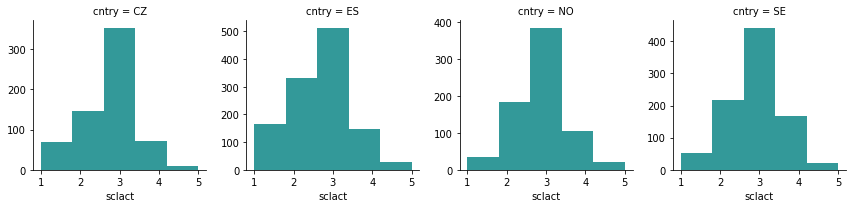

Shapiro Tests for Normality
CZ (0.8517600893974304, 3.2631608025549396e-24)

ES (0.892457902431488, 5.746904176126056e-28)

NO (0.8678725957870483, 2.398206966061988e-24)

SE (0.8822488784790039, 1.283228571387991e-25)



In [22]:
# Plotting histograms of happiness for each country for each year
g = sns.FacetGrid(ess_c, col='cntry', dropna=True, sharey=False)
g = g.map(plt.hist, 'sclact', alpha=0.8, color='teal', bins=5)
print('\t\tDistribution of Social Activities from 2014 for Four European Countries')
plt.show()

# Testing each country and each year to determine if happiness is normally distributed through Shapiro test
# Creating lists of countries and years
cntrys = list(ess_c.cntry.unique())
print('Shapiro Tests for Normality')
for cnt in cntrys:
    # Printing Shapiro test results
    print(cnt, shapiro(ess_c[ess_c.cntry ==cnt].sclact.dropna()))
    print()    

Watching the histograms and the Shapiro-Wilks test results we can affirm that the distribution of the values are not normal. I will choose the Kruskal-Wallis, a non-parametric version of ANOVA test.

In [23]:
# Printing Kruskal test statistic
print(kruskal(ess_c[ess_c.cntry == 'CZ'].sclact.dropna(),
             ess_c[ess_c.cntry == 'ES'].sclact.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclact.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclact.dropna()))

KruskalResult(statistic=53.809701709377876, pvalue=1.2319673584021775e-11)


Reading the Kruskal test, we can see that the distributions of social activities are different from one another.  We need to run t-tests for all distributions against each other to determine which ones are the different.

In [24]:
# Printing all combinations of t-tests
print('CZ vs ES:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclact.dropna(),
             ess_c[ess_c.cntry == 'ES'].sclact.dropna()))
print('CZ vs NO:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclact.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclact.dropna()))
print('CZ vs SE:', ttest_ind(ess_c[ess_c.cntry == 'CZ'].sclact.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclact.dropna()))
print('ES vs NO:', ttest_ind(ess_c[ess_c.cntry == 'ES'].sclact.dropna(),
             ess_c[ess_c.cntry == 'NO'].sclact.dropna()))
print('ES vs SE:', ttest_ind(ess_c[ess_c.cntry == 'ES'].sclact.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclact.dropna()))
print('NO vs SE:', ttest_ind(ess_c[ess_c.cntry == 'NO'].sclact.dropna(),
             ess_c[ess_c.cntry == 'SE'].sclact.dropna()))

CZ vs ES: Ttest_indResult(statistic=1.9231457887987455, pvalue=0.054616497855173432)
CZ vs NO: Ttest_indResult(statistic=-3.4467356116942098, pvalue=0.00058446345406456233)
CZ vs SE: Ttest_indResult(statistic=-4.0018841917465595, pvalue=6.5802143027997247e-05)
ES vs NO: Ttest_indResult(statistic=-5.6711491296635321, pvalue=1.6345881270312057e-08)
ES vs SE: Ttest_indResult(statistic=-6.5002573458665971, pvalue=1.0000807299873861e-10)
NO vs SE: Ttest_indResult(statistic=-0.48232162702341058, pvalue=0.62964212720174506)


As a result from the t-tests we can affirm that:

- Norway and Sweden are not significantly different
- Czech Republic and Spain are slightly different
- Czech Republic is significantly different from Sweden and Norway,
- Spain is significantly different from Sweden, and Norway.

Therefore, Czech Republic and Spain standout as for social activities, with both having less social activities than the other countries. 

We can validate this by calculating the mean of social activities for each country:

In [25]:
ES_act = ess_raw['sclact'][(ess_raw['cntry'] == 'ES') & (ess_raw['year'] == 7)].dropna()
NO_act = ess_raw['sclact'][(ess_raw['cntry'] == 'NO') & (ess_raw['year'] == 7)].dropna()
SE_act = ess_raw['sclact'][(ess_raw['cntry'] == 'SE') & (ess_raw['year'] == 7)].dropna()
CZ_act = ess_raw['sclact'][(ess_raw['cntry'] == 'CZ') & (ess_raw['year'] == 7)].dropna()

In [26]:
print('Mean social activities for Spain:', ES_act.mean())
print('Mean social activities for Czech Republic:', CZ_act.mean())
print('Mean social activities for Norway:', NO_act.mean())
print('Mean social activities for Sweden:', SE_act.mean())

Mean social activities for Spain: 2.6168776371308016
Mean social activities for Czech Republic: 2.703076923076923
Mean social activities for Norway: 2.859097127222982
Mean social activities for Sweden: 2.879424778761062
